In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/poly.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.drop(['sno'],axis=1,inplace=True)

In [ ]:
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_predict=lr.predict(x)
y_predict

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

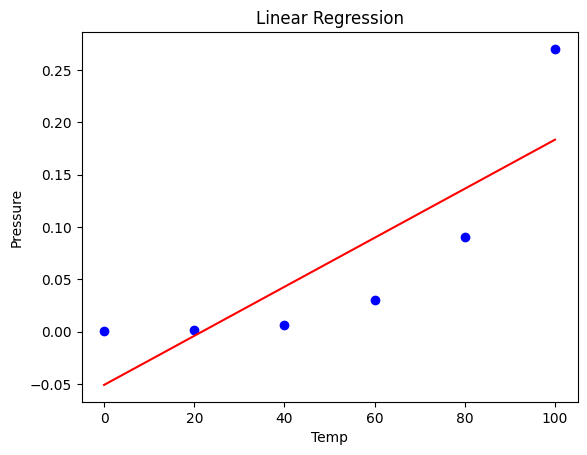

<Axes: xlabel='Temperature', ylabel='Pressure'>

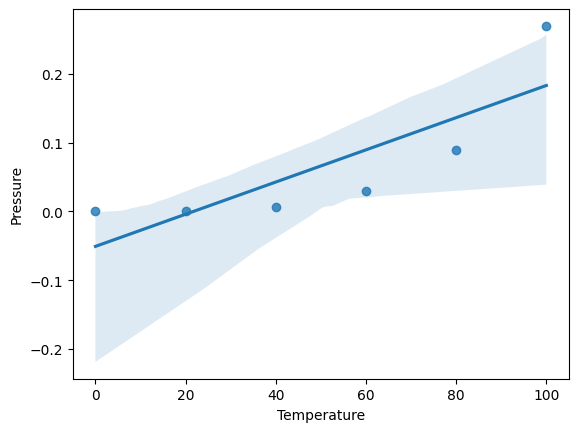

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue')
plt.plot(x,y_predict,color='red')
plt.xlabel('Temp')
plt.ylabel('Pressure')
plt.title('Linear Regression')
plt.show()
import seaborn as sns
sns.regplot(x=x,y=y)


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

print(r2_score(y,y_predict))

print(mean_absolute_percentage_error(y,y_predict))


0.690349972603981
44.775078189300416


In [ ]:
# here metric values are not good .this can be improved by multiple regression
# this can be done in multiple regression also by increasing features degree or increasing required features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
# ax^3+bx^2+cx+d=0
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [ ]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_predict1=model1.predict(x_poly)
y_predict1

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [ ]:
df1=pd.DataFrame({'Actual':y,'Simple_Regression':y_predict,'Polynomial_Regression':y_predict1})
df1

,Actual,Simple_Regression,Polynomial_Regression
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


In [ ]:
print(r2_score(y,y_predict1))

print(mean_absolute_percentage_error(y,y_predict1))

0.9966691251761722
2.7865912208923658


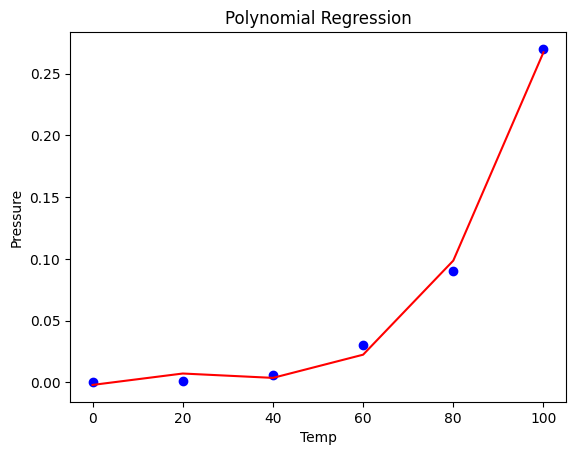

In [ ]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_predict1,color='red')
plt.xlabel('Temp')
plt.ylabel('Pressure')
plt.title('Polynomial Regression')
plt.show()